In [72]:
#initialization
import pandas as pd
import numpy as np
data = pd.read_csv("./pokedata.csv") # read data
pokelist=data['name'].tolist() # create pokemon list

def cos_sim(A, B): # cosine similarity function
    return np.dot(A, B)/(np.linalg.norm(A)*np.linalg.norm(B))

def poke_recommend(poke):
    if poke in pokelist: # if pokemon exists in the list
        poke_idx = pokelist.index(poke)
        poke_sim = []
        poke_ret = []
        for i in range(len(pokelist)): # calculate cosine similarity with other pokemon
            poke_sim.append([i, cos_sim(data.iloc[poke_idx][2:].tolist(), data.iloc[i][2:].tolist())])

        poke_sim.sort(key=lambda x: x[1], reverse=True) # sort highest to lowest cosine similarity 
        poke_out = [pokelist[poke_sim[1][0]], pokelist[poke_sim[2][0]], pokelist[poke_sim[3][0]]] # find 3 most similar pokemons(first is identical pokemon)
        poke_ret.append(poke_out)
        poke_ret.append(poke_sim)
        return poke_ret # list consists of 2 elements, 1st: recommended pokemon lists, 2nd: 
    else:
        # NUGU recall "다시 한 번 포켓몬을 말씀해주세요"
        return None

In [73]:
### main function
#to be linked with NUGU speaker

poke = '이상해씨' # pokemon input from NUGU speaker
#poke_out =[]
poke_out = poke_recommend(poke)[0] # recommended 3 pokemons
print(poke_out)

['꼬부기', '거북왕', '파이리']


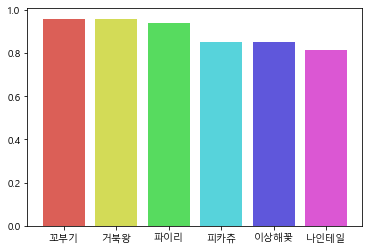

In [75]:
### cosine similarity visual datachart

import matplotlib.pyplot as plt
import matplotlib, platform
import seaborn as sns

if platform.system() == 'Windows': # Window 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 

n = 6 # number of pokemon's cosine similarity you want to check
pokemon = []
values = []

for i in range(n):
    pokemon.append(pokelist[poke_recommend(poke)[1][i+1][0]])
    values.append(poke_recommend(poke)[1][i+1][1])

x = np.arange(n)
colors = sns.color_palette('hls',len(pokemon))

plt.xticks(x, pokemon)
plt.bar(x, values, color=colors)

plt.show()